### Feature Engineering with Dates

In this tutorial I present the *datetime* format that Pandas provides to handle datetime features. In the end I create a function that generates **23** features from a **single** one.

Dates and Times are very precious features for businesses and sales. While a single column can't help us make meaningful insights and take important decisions, creating a handful of features from it can transform data into profit.

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pylab as plt
import seaborn as sns
from itertools import cycle
plt.style.use('bmh')
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])
%matplotlib inline 
sns.set_style("whitegrid")

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('max_colwidth', 100)

In [2]:
data = pd.read_csv('dataset_with_dates.csv')
data.head()

,card_id,purchase_date,city_id,category_1,category_2,category_3,month_lag,purchase_amount
0,C_ID_415bb3a509,3/11/2018 14:57,107,N,1.0,B,1,-0.557574
1,C_ID_415bb3a509,3/19/2018 18:53,140,N,1.0,B,1,-0.569580
2,C_ID_415bb3a509,4/26/2018 14:08,330,N,1.0,B,2,-0.551037
3,C_ID_415bb3a509,3/7/2018 9:43,-1,Y,NaN,B,1,-0.671926
4,C_ID_ef55cf8d4b,3/22/2018 21:07,-1,Y,NaN,B,1,-0.659904


### First Step
Convert date to [datetime](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html) format using Pandas.

After conversion each Series (one column) can be used to access and return several datetime properties like *Series.dt.property

In [3]:
data['purchase_date'] = pd.to_datetime(data['purchase_date']) 
data.head(1)

,card_id,purchase_date,city_id,category_1,category_2,category_3,month_lag,purchase_amount
0,C_ID_415bb3a509,2018-03-11 14:57:00,107,N,1.0,B,1,-0.557574


### Properties

**Series.dt.date** - Returns the date part of datetime without timezone information

In [4]:
data['purchase_date'].dt.date.head(1)

0    2018-03-11
Name: purchase_date, dtype: object

**Series.dt.time** - Returns the time part of datetime

In [5]:
data['purchase_date'].dt.time.head(1)

0    14:57:00
Name: purchase_date, dtype: object

**Series.dt.year** - Returns the year (int) of the datetime

In [6]:
data['purchase_date'].dt.year.head(1)

0    2018
Name: purchase_date, dtype: int64

**Series.dt.month** - Returns the month (int) of the datetime

In [7]:
data['purchase_date'].dt.month.head(1)

0    3
Name: purchase_date, dtype: int64

**Series.dt.day** - Returns the day (int) of the datetime

In [8]:
data['purchase_date'].dt.day.head(1)

0    11
Name: purchase_date, dtype: int64

**Series.dt.hour** - Returns the hour (int) of the datetime

In [9]:
data['purchase_date'].dt.hour.head(1)

0    14
Name: purchase_date, dtype: int64

**Series.dt.minute** - Returns the minute (int) of the datetime

In [10]:
data['purchase_date'].dt.minute.head(1)

0    57
Name: purchase_date, dtype: int64

**Series.dt.second/microsecond/nanosecond** - Returns the second/microsecond/nanosecond (int) of the datetime

In [11]:
data['purchase_date'].dt.second.head(1)

0    0
Name: purchase_date, dtype: int64

**Series.dt.week/weekofyear** - Returns the week number of the year. Both properties are the same

In [12]:
data['purchase_date'].dt.week.head(1)

0    10
Name: purchase_date, dtype: int64

**Series.dt.dayofweek/weekday** - Returns the day of the week with Monday=0 and Sunday=6. Both properties are the same

In [13]:
data['purchase_date'].dt.dayofweek.head(1)

0    6
Name: purchase_date, dtype: int64

**Series.dt.dayofyear** - Returns the ordinal day of the year

In [14]:
data['purchase_date'].dt.dayofyear.head(1)

0    70
Name: purchase_date, dtype: int64

**Series.dt.quarter** - Returns the quarter of the date

In [15]:
data['purchase_date'].dt.quarter.head(1)

0    1
Name: purchase_date, dtype: int64

**Series.dt.is_month_start** - Indicator for whether the date is the first day of the month

In [16]:
data['purchase_date'].dt.is_month_start.head(1)

0    False
Name: purchase_date, dtype: bool

**Series.dt.is_month_end** - Indicator for whether the date is the last day of the month

In [17]:
data['purchase_date'].dt.is_month_end.head(1)

0    False
Name: purchase_date, dtype: bool

**Series.dt.is_quarter_start** - Indicator for whether the date is the first day of a quarter

In [18]:
data['purchase_date'].dt.is_quarter_start.head(1)

0    False
Name: purchase_date, dtype: bool

**Series.dt.is_quarter_end** - Indicator for whether the date is the last day of a quarter

In [19]:
data['purchase_date'].dt.is_quarter_end.head(1)

0    False
Name: purchase_date, dtype: bool

**Series.dt.is_year_start** - Indicate whether the date is the first day of a year

In [20]:
data['purchase_date'].dt.is_year_start.head(1)

0    False
Name: purchase_date, dtype: bool

**Series.dt.is_year_end** - Indicate whether the date is the last day of a year

In [21]:
data['purchase_date'].dt.is_year_end.head(1)

0    False
Name: purchase_date, dtype: bool

**Series.dt.is_leap_year** - Indicate whether the date belongs to a leap year

In [22]:
data['purchase_date'].dt.is_leap_year.head(1)

0    False
Name: purchase_date, dtype: bool

### Feature Engineering

In [23]:
# Takes a dataframe and the column name as inputs
def create_datetime_features(df, c):
    if (df[c].dtype!='datetime64[ns]'):
        pd.to_datetime(df[c]) 
        
    df['year'] = df[c].dt.year
    df['month'] = df[c].dt.month
    df['day'] = df[c].dt.day
    df['hour'] = df[c].dt.hour
    df['session'] = df['hour'].apply(lambda x: get_session(x))
    df['minute'] = df[c].dt.minute
    df['second'] = df[c].dt.second
    df['week'] = df[c].dt.week
    df['dayofweek'] = df[c].dt.dayofweek
    df['isWeekend'] = (df[c].dt.dayofweek >=5).astype(int)
    df['isWeekday'] = (df[c].dt.dayofweek < 5).astype(int)
    df['dayofyear'] = df[c].dt.dayofyear
    df['quarter'] = df[c].dt.quarter
    df['isMonthStart'] = df[c].dt.is_month_start.astype(int)
    df['isMonthEnd'] = df[c].dt.is_month_end.astype(int)
    df['isQuarterStart'] = df[c].dt.is_quarter_start.astype(int)
    df['isQuarterEnd'] = df[c].dt.is_quarter_end.astype(int)
    df['isYearStart'] = df[c].dt.is_year_start.astype(int)
    df['isYearEnd'] = df[c].dt.is_year_end.astype(int)
    df['isLeapYear'] = df[c].dt.is_leap_year.astype(int)
    df['monthDifferenceFromToday'] = (datetime.datetime.today() - df[c]).dt.days//30
    df['dayDifferenceFromToday'] = (datetime.datetime.today() - df[c]).dt.days
    # Count days until a specific date arrives (value=0 on the day of the event)
    df['blackFriday2017']=(pd.to_datetime('2017-11-24') - df[c]).dt.days.apply(lambda x: x if x >= 0 and x < 100 else -1)

    
def get_session(time):
    if time > 4 and time<12:
        return 0 # Morning
    elif time >= 12 and time < 17:
        return 1 # Afternoon
    elif time >= 17 and time < 21:
        return 2 # Evening
    else:
        return 3 # Night    

In [24]:
create_datetime_features(data, 'purchase_date')

In [25]:
data.head(10)

,card_id,purchase_date,city_id,category_1,category_2,category_3,month_lag,purchase_amount,year,month,day,hour,session,minute,second,week,dayofweek,isWeekend,isWeekday,dayofyear,quarter,isMonthStart,isMonthEnd,isQuarterStart,isQuarterEnd,isYearStart,isYearEnd,isLeapYear,monthDifferenceFromToday,dayDifferenceFromToday,blackFriday2017
0,C_ID_415bb3a509,2018-03-11 14:57:00,107,N,1.0,B,1,-0.557574,2018,3,11,14,1,57,0,10,6,1,0,70,1,0,0,0,0,0,0,0,25,753,-1
1,C_ID_415bb3a509,2018-03-19 18:53:00,140,N,1.0,B,1,-0.569580,2018,3,19,18,2,53,0,12,0,0,1,78,1,0,0,0,0,0,0,0,24,744,-1
2,C_ID_415bb3a509,2018-04-26 14:08:00,330,N,1.0,B,2,-0.551037,2018,4,26,14,1,8,0,17,3,0,1,116,2,0,0,0,0,0,0,0,23,707,-1
3,C_ID_415bb3a509,2018-03-07 09:43:00,-1,Y,NaN,B,1,-0.671926,2018,3,7,9,0,43,0,10,2,0,1,66,1,0,0,0,0,0,0,0,25,757,-1
4,C_ID_ef55cf8d4b,2018-03-22 21:07:00,-1,Y,NaN,B,1,-0.659904,2018,3,22,21,3,7,0,12,3,0,1,81,1,0,0,0,0,0,0,0,24,741,-1
5,C_ID_ef55cf8d4b,2018-04-02 12:53:00,231,N,1.0,B,2,-0.633007,2018,4,2,12,1,53,0,14,0,0,1,92,2,0,0,0,0,0,0,0,24,731,-1
6,C_ID_ef55cf8d4b,2018-03-28 19:50:00,69,N,1.0,B,1,5.263697,2018,3,28,19,2,50,0,13,2,0,1,87,1,0,0,0,0,0,0,0,24,735,-1
7,C_ID_ef55cf8d4b,2018-04-05 08:06:00,231,N,1.0,B,2,-0.553787,2018,4,5,8,0,6,0,14,3,0,1,95,2,0,0,0,0,0,0,0,24,728,-1
8,C_ID_ef55cf8d4b,2018-04-07 18:37:00,69,N,1.0,B,2,-0.596643,2018,4,7,18,2,37,0,14,5,1,0,97,2,0,0,0,0,0,0,0,24,725,-1
9,C_ID_ef55cf8d4b,2018-03-17 18:10:00,69,N,1.0,B,1,-0.607191,2018,3,17,18,2,10,0,11,5,1,0,76,1,0,0,0,0,0,0,0,24,746,-1


### Boom!

**23** new features from a single column

### Let's plot some figures

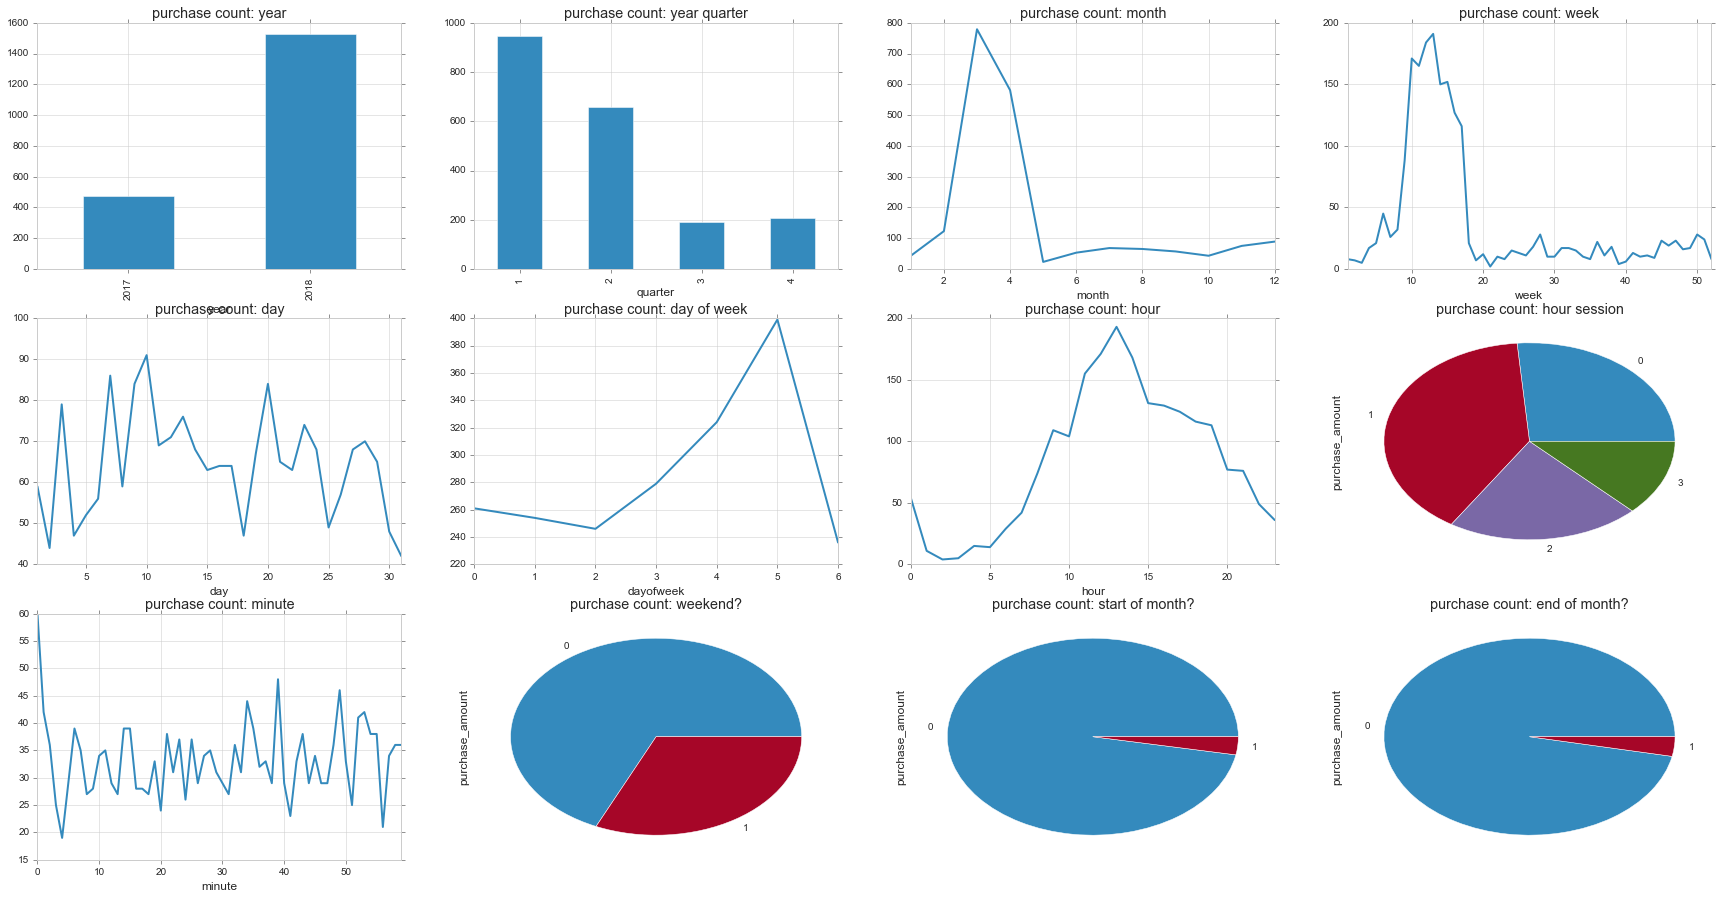

In [26]:
fig, ax = plt.subplots(3, 4, figsize=(30, 15))
data.groupby('year').count()['purchase_amount'].plot(kind='bar',title='purchase count: year',ax=ax[0,0]);
data.groupby('quarter').count()['purchase_amount'].plot(kind='bar',title='purchase count: year quarter',ax=ax[0,1]);
data.groupby('month').count()['purchase_amount'].plot(kind='line',title='purchase count: month',ax=ax[0,2]);
data.groupby('week').count()['purchase_amount'].plot(kind='line',title='purchase count: week',ax=ax[0,3]);
data.groupby('day').count()['purchase_amount'].plot(kind='line',title='purchase count: day',ax=ax[1,0]);
data.groupby('dayofweek').count()['purchase_amount'].plot(kind='line',title='purchase count: day of week',ax=ax[1,1]);
data.groupby('hour').count()['purchase_amount'].plot(kind='line',title='purchase count: hour',ax=ax[1,2]);
data.groupby('session').count()['purchase_amount'].plot(kind='pie',title='purchase count: hour session',ax=ax[1,3]);
data.groupby('minute').count()['purchase_amount'].plot(kind='line',title='purchase count: minute',ax=ax[2,0]);
data.groupby('isWeekend').count()['purchase_amount'].plot(kind='pie',title='purchase count: weekend?',ax=ax[2,1]);
data.groupby('isMonthStart').count()['purchase_amount'].plot(kind='pie',title='purchase count: start of month?',ax=ax[2,2]);
data.groupby('isMonthEnd').count()['purchase_amount'].plot(kind='pie',title='purchase count: end of month?',ax=ax[2,3]);